根据plc，识别工况

In [18]:
import joblib 
import pandas as pd
import numpy as np
from itertools import zip_longest
import os
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def plot_sensor_byid(df, start, end):
    '''
    描述：
        绘制Sensor的Current_1，Vibration_1的图像
    '''
    plt.figure(figsize=(16,6))
    f = (df['id']>=start)&(df['id']<end)

    plt.subplot(1,2,1)
    df.loc[f,'Current_1'].plot()
    plt.title('Current_1')

    plt.subplot(1,2,2)
    df.loc[f,'Vibration_1'].plot()
    plt.title('Vibration_1')

def plot_sensor(test_no):
    df = joblib.load('../2.1preprocess_train_data/concats_more/concat_0%d.lz4'%test_no)
    plc = joblib.load('../../刀具剩余寿命预测_新数据/2.1preprocess_train_data/train_plc/train_0%d_plc.lz4'%test_no)
    plt.figure(figsize=(16,6))

    plt.subplot(1,2,1)
    df.loc[:,'Current_1__mean'].plot()
    plt.plot(plc['csv_no'])
    plt.title('Current_1__mean')

    plt.subplot(1,2,2)
    df.loc[:,'Vibration_1__mean'].plot()
    plt.title('Vibration_1__mean')
    
def plot_plc_bycsv_no(plc, start, end, apply_cols=['spindle_load']):
    '''
    描述：
        绘制plc的图像
    参数：
        spindle_load, 
    '''
#     plt.figure(figsize=(20,10))
    cond = (plc['csv_no']>=start)&(plc['csv_no']<end)
#     plc.loc[cond, ['spindle_load','x','y','z']].plot()
    plc.loc[cond, apply_cols].plot()
    plt.title(*apply_cols)

# 查看plc数据

# 1.plc_01

In [20]:
plc_01 = joblib.load('../2.1preprocess_train_data/train_plc_RULR/train_01_plc.lz4')

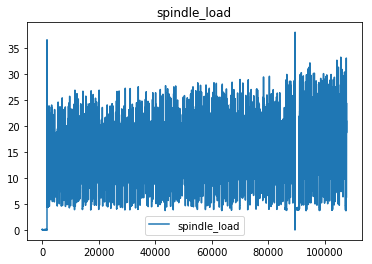

In [10]:
plot_plc_bycsv_no(plc_01, 1, 48)

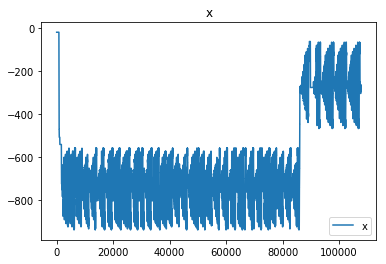

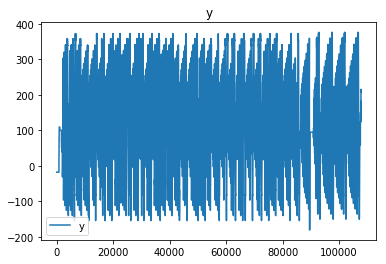

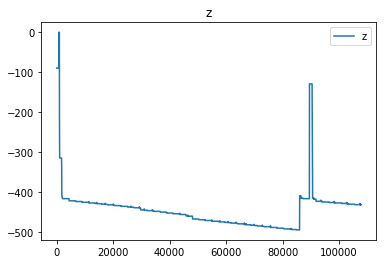

In [7]:
plot_plc_bycsv_no(plc_01, 1, 48, ['x'])
plot_plc_bycsv_no(plc_01, 1, 48, ['y'])
plot_plc_bycsv_no(plc_01, 1, 48, ['z'])

# 2.plc_02

In [35]:
plc_02 = joblib.load('../2.1preprocess_train_data/train_plc_RULR/train_02_plc.lz4')

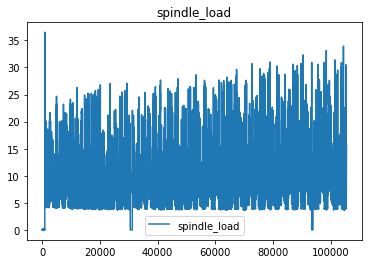

In [36]:
plot_plc_bycsv_no(plc_02, 1, 48)

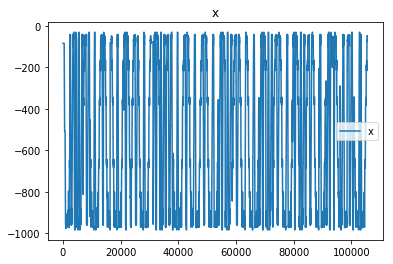

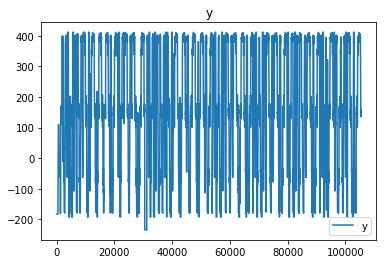

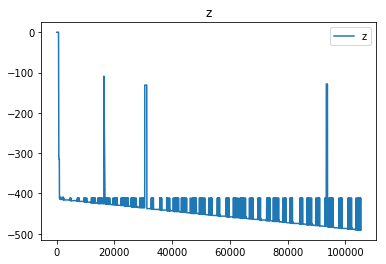

In [37]:
plot_plc_bycsv_no(plc_02, 1, 48, ['x'])
plot_plc_bycsv_no(plc_02, 1, 48, ['y'])
plot_plc_bycsv_no(plc_02, 1, 48, ['z'])

# 3.plc_03

In [17]:
plc_03 = joblib.load('../2.1preprocess_train_data/train_plc_RULR/train_03_plc.lz4')

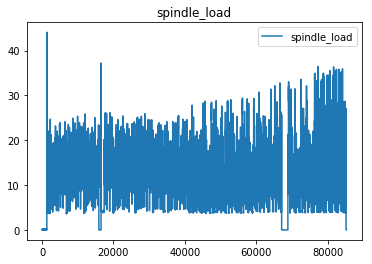

In [18]:
plot_plc_bycsv_no(plc_03, 1, 48)

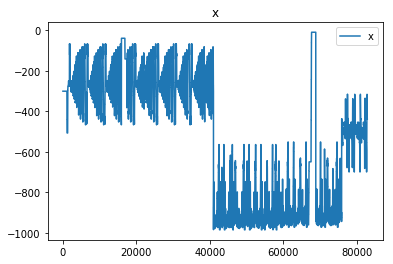

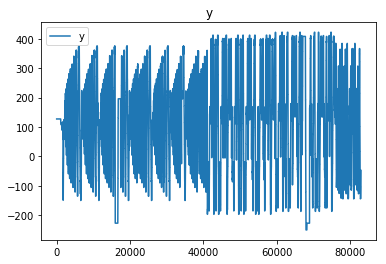

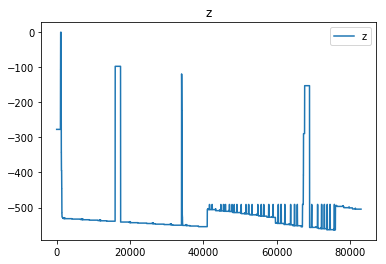

In [19]:
plot_plc_bycsv_no(plc_03, 1, 37, ['x'])
plot_plc_bycsv_no(plc_03, 1, 37, ['y'])
plot_plc_bycsv_no(plc_03, 1, 37, ['z'])

# 提取特征，进行聚类

In [22]:
plc_01 = joblib.load('../2.1preprocess_train_data/train_plc_RULR/train_01_plc.lz4')
plc_02 = joblib.load('../2.1preprocess_train_data/train_plc_RULR/train_02_plc.lz4')
plc_03 = joblib.load('../2.1preprocess_train_data/train_plc_RULR/train_03_plc.lz4')

In [45]:
import pandas as pd
from tsfresh import select_features
from tsfresh import extract_features

kind_to_fc_parameters = {
    "x": {'median': None,
    'standard_deviation': None,
    'maximum': None,
     'minimum': None,
    'mean_abs_change': None,
    'skewness': None,
    'kurtosis': None},
    
    "y": {'median': None,
    'standard_deviation': None,
    'maximum': None,
     'minimum': None,
    'mean_abs_change': None,
    'skewness': None,
    'kurtosis': None},
    
    'z':{
        'mean_abs_change': None,
    }
}
# minimal_parameters = {
#     'median': None,
#     'standard_deviation': None,
#     'maximum': None,
#      'minimum': None,
#     'mean_abs_change': None,
#      'mean_change': None,
#     'skewness': None,
#     'kurtosis': None,
# }

In [46]:
from tsfresh.feature_extraction import EfficientFCParameters
# EfficientFCParameters()

In [47]:
# def gen_plc_points(plc, window_size=20):
#     plc_tmp = plc[['x','y','z']].copy()
#     plc_tmp['sort_col'] = plc_tmp.index
#     plc_tmp['id'] = plc_tmp['sort_col'].apply(lambda x: int(x/window_size))
#     extracted_features = extract_features(plc_tmp, column_id='id', column_sort='sort_col', n_jobs=48, 
#                                   default_fc_parameters=settings, disable_progressbar = True)
    
#     plc_tmp_1 = plc[['RULR','CL', 'CLI']].copy()
#     plc_tmp_1['sort_col'] = plc_tmp.index
#     plc_tmp_1['id'] = plc_tmp_1['sort_col'].apply(lambda x: int(x/window_size))
#     extracted_features_1 = extract_features(plc_tmp_1, column_id='id', column_sort='sort_col', n_jobs=48, 
#                                   default_fc_parameters={'mean':None}, disable_progressbar = True)
    
#     result = pd.concat([extracted_features, extracted_features_1], axis=1)
#     drop_cond = (result['CLI__mean'].values%5) != 0 
#     result = result[drop_cond==False]
#     result.reset_index(drop=True)
#     return result

def gen_plc_points(plc):
    '''
    提取x,y,z的特征
    '''
    plc_tmp = plc[['x','y','z', 'CL', 'CLI']].copy()
#     plc_tmp['sort_col'] = plc_tmp['CL']
#     plc_tmp['id'] = plc_tmp['CLI']
    extracted_features = extract_features(plc_tmp, column_id='CLI', column_sort='CL', n_jobs=48,
                                  kind_to_fc_parameters=kind_to_fc_parameters, disable_progressbar = True)
    
    return extracted_features

In [ ]:
%%time
plc_points_01 = gen_plc_points(plc_01)
plc_points_02 = gen_plc_points(plc_02)
plc_points_03 = gen_plc_points(plc_03)

plc_points = pd.concat([plc_points_01, plc_points_02, plc_points_03], axis=0).reset_index(drop=True)

In [ ]:
# joblib.dump(plc_points,'./plc_points', compress='lz4')

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
X = plc_points.values
n_clusters = 4
# kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)

ac = AgglomerativeClustering(n_clusters=n_clusters).fit(X)

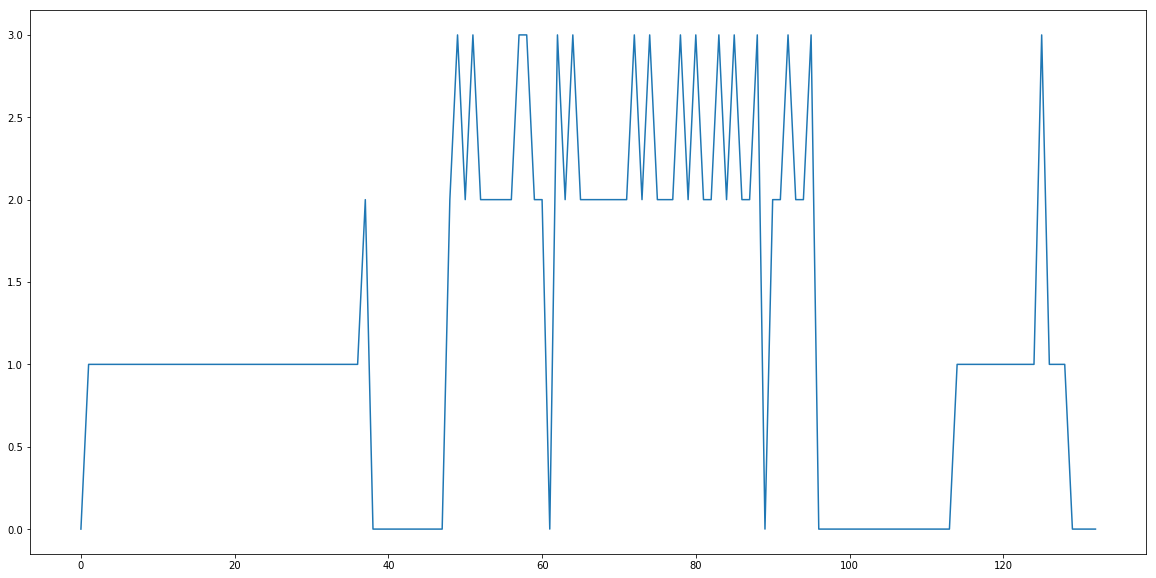

In [38]:
plt.figure(figsize=(20,10))
# plt.plot(kmeans.labels_)
plt.plot(ac.labels_)

In [43]:
plc = pd.concat([plc_01,plc_02,plc_03], axis=0).reset_index(drop=True)

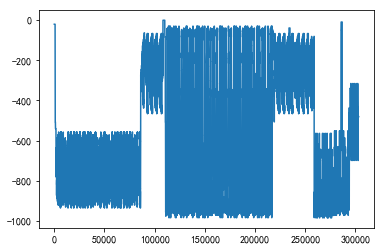

In [44]:
plt.plot(plc['x'])

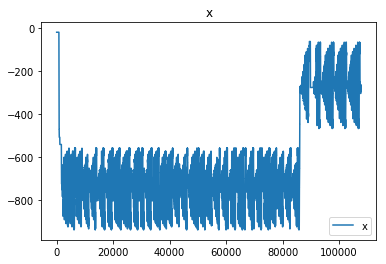

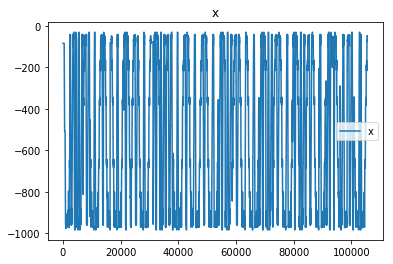

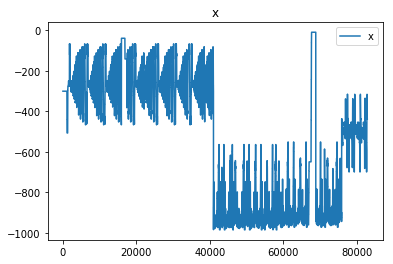

In [40]:
plot_plc_bycsv_no(plc_01, 1, 48, ['x'])
plot_plc_bycsv_no(plc_02, 1, 48, ['x'])
plot_plc_bycsv_no(plc_03, 1, 37, ['x'])

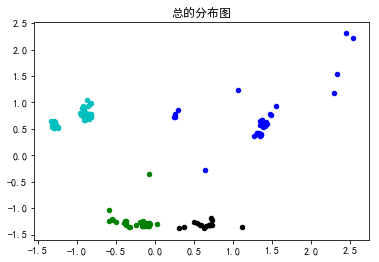

In [41]:
import matplotlib as  mpl

mpl.rcParams[u'font.sans-serif'] = ['simhei']
mpl.rcParams['axes.unicode_minus'] = False

from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca_2.transform(X)

color = ['b', 'c', 'g', 'k', 'm', 'r', 'y']
for i in range(n_clusters):
    cond = ac.labels_ == i
    plt.scatter(X_pca[cond,0], X_pca[cond,1], c = color[i], s=20)
    plt.title('总的分布图')


In [21]:
plc = pd.concat([plc_01,plc_02,plc_03], axis=0).reset_index(drop=True)

In [42]:
# 探索哪些提取的特征能更好地反应刀具的工况
# plt.figure(figsize=(20,10))
# plt.plot(plc_points['y__median'])
# plt.figure(figsize=(20,10))
# plt.plot(plc_points['y__standard_deviation'])
# plt.figure(figsize=(20,10))
# plt.plot(plc['y'])